In [23]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import c

In [24]:
def generate_pb(diameter = 12, freq = 432058061289.4426, shape = (500, 500), deltal = 0.004):
    #Some credit to ChatGPT....I got lazy lol
    wavelength = c.value / freq
    fwhm = 1.02 * wavelength / diameter * (180/np.pi) * (3600)
    half_fov = deltal * shape[0] / 2
   
    #Grid for PB
    x = np.linspace(-half_fov, half_fov, shape[0])
    y = np.linspace(-half_fov, half_fov, shape[1])
    x, y = np.meshgrid(x, y)
   
    #Gaussian PB parameters
    mean = [0, 0]  # Mean (center) of the Gaussian
    std = fwhm / (2*np.sqrt(2*np.log(2)))
    covariance_matrix = np.array([[std, 0], [0, std]])  # Covariance matrix
   
    # 2-D Gaussian PB
    x_y = np.column_stack([x.ravel(), y.ravel()])
    pb = (
        1 / (2 * np.pi * np.sqrt(np.linalg.det(covariance_matrix)))
    ) * np.exp(-0.5 * np.sum(np.dot(x_y - mean, np.linalg.inv(covariance_matrix)) * (x_y - mean), axis=1))

    # Reshape the PDF values to match the shape of the grid
    pb = pb.reshape(x.shape)
   
    return pb, fwhm

In [21]:
data = np.load("../../HTLup_continuum_full.npz")
freq_per_spw = data["freq_per_spw"]


In [11]:
freq = freq_per_spw.mean()

In [25]:
pb, fwhm = generate_pb(diameter = 12, freq = freq, shape = (256, 256), deltal = 0.0015)

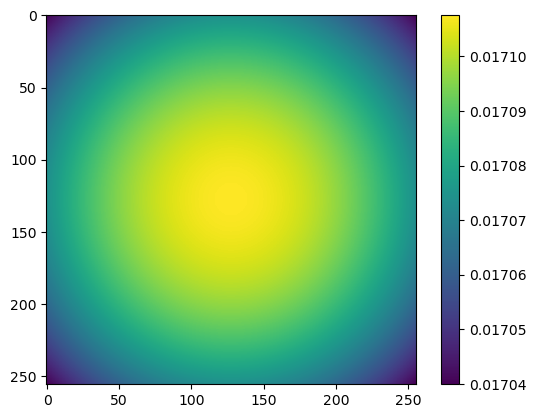

: 

In [29]:
plt.imshow(pb)
plt.colorbar()